<a href="https://colab.research.google.com/github/zcvpal2/Aiffel-follow-deep-learning/blob/main/10_aiffel_%EB%B9%84%EC%8A%B7%ED%95%9C_%EC%96%BC%EA%B5%B4_%EC%B0%BE%EA%B8%B0(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 얼굴 임베딩 만들기 얼굴 인식
누구와 닮았는지 확인하기 위해서는 우선적으로 얼굴 영역만을 정확하게 인식해서 추출하는 작업이 필요하다.
이를 위해서는 우선 input image 얼굴이 들어있는 사진이 필요하고 그 다음에는 얼굴이 어디에 있는지 알아내기 위한 detection 과정을 거처 얼굴이라고 인식할 수 있는 부분만 잘라내는 crop를 통해 얻을 수 있다. 
이후 군집화, 유사도, 분류 등 다양한 task를 사용한다.

In [3]:
# https://github.com/ageitgey/face_recognition - Face Recognition 라이브러리

file_list: ['trump.jpg', 'clinton.jpeg', 'obama.jpg', 'biden.jpg', 'reagan.jpg', 'bush.jpeg']


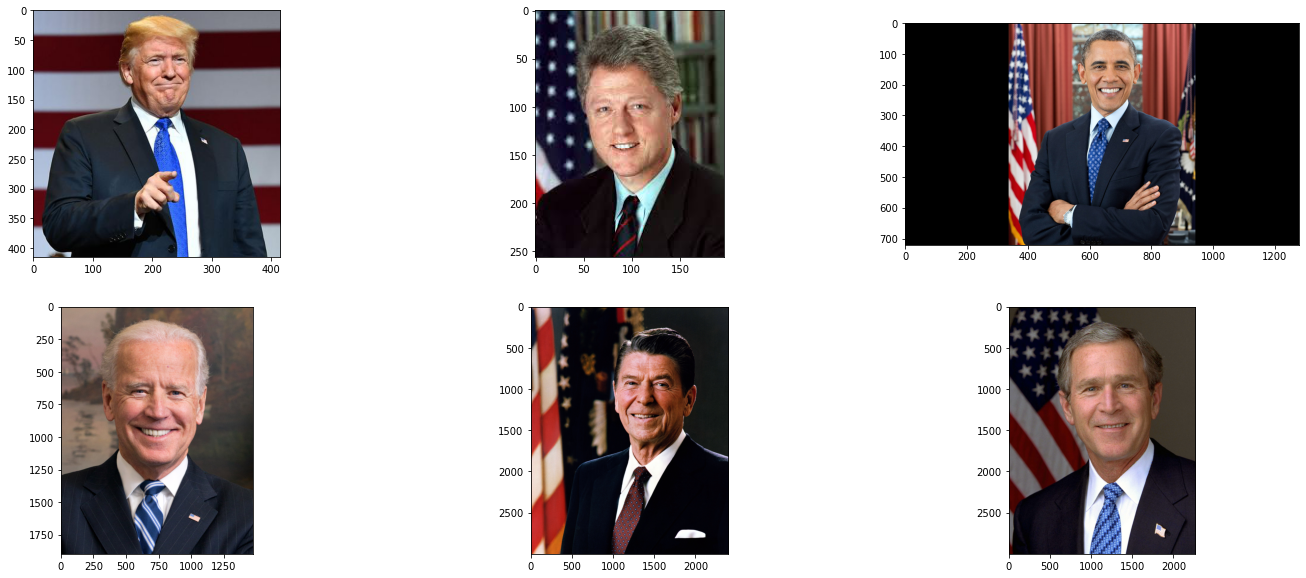

In [4]:
import os
import matplotlib.pyplot as plt 
import matplotlib.image as img

dir_path = '/content/drive/MyDrive/AIFFEL/face_embedding/images'
file_list = os.listdir(dir_path)

print("file_list: {}".format(file_list))

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (24,10)) 

for i, ax in enumerate(axes.flatten()): ## 이미지를 펼쳐서 보이기 위한 과정
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

In [5]:
!pip3 install face_recognition
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=9956bb5f7fc34ded45839ba9332bc941bb722ea68b25a0db4755ef90c0f15a53
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[(98, 758, 284, 572)]


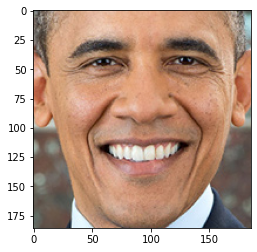

In [6]:
# obama.jpg를 face_recognition.face_locations를 사용해 찾는다. 
# 임베딩 추출 할 이미지를 만들기 위해 detection 

import face_recognition 
import os 
%matplotlib inline 

image_path =  '/content/drive/MyDrive/AIFFEL/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations) ## 얼굴영역 좌표

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face) # crop 된 face 

In [7]:

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

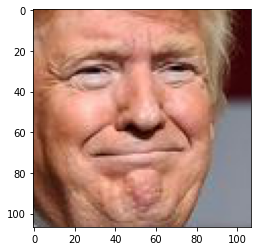

In [8]:
image_path = '/content/drive/MyDrive/AIFFEL/face_embedding/images/trump.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [9]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수

# Face Recognition 패키지에서 제공하는 얼굴 임베딩 벡터를 구하는 함수는 
# face_recognition.face_encodings() 

# 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126254,  0.11014756, -0.01082434, -0.05268792,  0.01033733,
        -0.0081381 , -0.07251763, -0.09226447,  0.19304717, -0.09246377,
         0.23908521,  0.06770286, -0.2212313 , -0.14119361,  0.05562158,
         0.13705495, -0.17924419, -0.07232306, -0.1118328 , -0.11370808,
         0.03956439, -0.01019117,  0.09421782,  0.04493129, -0.12757553,
        -0.34449607, -0.05374933, -0.17703304,  0.00868219, -0.09721589,
        -0.09817185,  0.00278223, -0.17721349, -0.12789799,  0.0348983 ,
        -0.01991227, -0.00838926, -0.00132864,  0.18308598,  0.02447565,
        -0.12376569,  0.0995703 ,  0.02323568,  0.22983313,  0.28385246,
         0.06655722, -0.00558913, -0.09833538,  0.10058984, -0.23476952,
         0.06006299,  0.13415912,  0.08373027,  0.03900497,  0.10194538,
        -0.19337651,  0.01717631,  0.0897897 , -0.1600512 ,  0.01892103,
         0.03082441, -0.06051283, -0.04526768,  0.04633338,  0.20678683,
         0.10299791, -0.12437537, -0.0490515 ,  0.1

In [11]:
# 이미지 디렉토리 안의 모든 이미지를 임베딩 하여 dict 구조에 넣는 

In [12]:

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path) # 경로에 있는 file list를 가져온뒤
    embedding_dict = {} # 임베딩 dict를 만들고
    
    for file in file_list:
        img_path = os.path.join(dir_path, file) # 경로의 파일 이미지 하나씩 가지고 와서
        face = get_cropped_face(img_path) # 이미지의 crop 을 뽑아 얼굴만 추출
        embedding = get_face_embedding(face) # 얼굴을 임베딩 함수에 넣어 벡터 추출
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [13]:
embedding_dict = get_face_embedding_dict(dir_path) 
embedding_dict['trump'] # 트럼프 사진의 임베딩 벡터 확인

array([-0.15962465,  0.20268653,  0.03236368,  0.02439236, -0.06226429,
        0.05140708,  0.07351795, -0.16823344,  0.06962213, -0.05557962,
        0.17270115, -0.05094168, -0.35293114, -0.03164374,  0.0379298 ,
        0.17343853, -0.13260117, -0.15357378, -0.23523533, -0.08442686,
       -0.00134148,  0.0321067 , -0.08926149, -0.0267079 , -0.09581175,
       -0.25792351, -0.01057006, -0.11071659,  0.03133575, -0.0744492 ,
        0.05670554, -0.02273792, -0.19461147, -0.04576051,  0.00947583,
        0.01806067, -0.15026242, -0.0778732 ,  0.17577612,  0.01933256,
       -0.19744582, -0.03930522,  0.07374461,  0.20196025,  0.14767551,
       -0.01415388,  0.01724749, -0.11976211,  0.0946297 , -0.24318154,
       -0.0275512 ,  0.12169901,  0.14837697,  0.17079787,  0.06952564,
       -0.15360463,  0.02005425,  0.08199155, -0.19544819,  0.10653647,
        0.11468481, -0.21902826, -0.07677589, -0.06791048,  0.105876  ,
        0.05921572, -0.061157  , -0.11171091,  0.23917486, -0.15